# The vectorial schemes for hyperbolic problems

$$
\newcommand{\R}{{\mathbb R}}
\newcommand{\DdQq}[2]{{\mathrm D}_{#1}{\mathrm Q}_{#2}}
\newcommand{\drondt}{\partial_t}
\newcommand{\drondx}{\partial_x}
\newcommand{\drondy}{\partial_y}
\newcommand{\drondtt}{\partial_{tt}}
\newcommand{\drondxx}{\partial_{xx}}
\newcommand{\dx}{\Delta x}
\newcommand{\dt}{\Delta t}
\newcommand{\grandO}{{\mathcal O}}
\newcommand{\density}[2]{\,f_{#1}^{#2}}
\newcommand{\fk}[1]{\density{#1}{\vphantom{\star}}}
\newcommand{\fks}[1]{\density{#1}{\star}}
\newcommand{\moment}[2]{\,m_{#1}^{#2}}
\newcommand{\mk}[1]{\moment{#1}{\vphantom{\star}}}
\newcommand{\mke}[1]{\moment{#1}{e}}
\newcommand{\mks}[1]{\moment{#1}{\star}}
$$

Consider the conservative hyperbolic problem
$$\drondt u(t,x) + \drondx {\cdot} f(u(t,x)) = 0, \qquad t>0, \quad x\in\R^d,$$
where $u(t,x)\in\R^N$.

A vectorial scheme can be build by coupling $N$ elementary Boltzmann schemes, one for each scalar equation. The coupling takes place in the relaxation phase and in particular in the equilibrium values of the non conserved moments.

In this work session, we investigate some classical hyperbolic systems like the shallow water and the Euler systems. 

## Shallow water in 1D

The system reads
$$\begin{aligned}&\drondt h + \drondx q = 0, \\ &\drondt q + \drondx(q^2/h+gh^2/2) = 0, \end {aligned}$$
where $g$ can be taken to $1$.
The simulation will be done on $(0,1)$ and Neumann boundary conditions will be added.

We use here two coupled $\DdQq{1}{2}$ for the simulation of this problem. The velocity of the scheme will be taken to $2$.

In [8]:
import sympy as sp
import pyLBM

h, q, X, LA, g = sp.symbols('h, q, X, LA, g')
la = 2.              # velocity of the scheme
s_h, s_q = 1.7, 1.7  # relaxation parameter

dico = {
    'dim':1,
    'scheme_velocity':la,
    'schemes':[
        {
            'velocities':[1,2],
            'conserved_moments':h,
            'polynomials':[1, LA*X],
            'relaxation_parameters':[0, s_h],
            'equilibrium':[h, q],
        },
        {
            'velocities':[1,2],
            'conserved_moments':q,
            'polynomials':[1, LA*X],
            'relaxation_parameters':[0, s_q],
            'equilibrium':[q, q**2/h+.5*g*h**2],
        },
    ],
    'parameters':{LA:la, g:1.},
}
scheme = pyLBM.Scheme(dico)
print(scheme)

[0] WARNING  pyLBM.scheme in function __init__ line 194
The value 'space_step' is not given or wrong.
The scheme takes default value: dx = 1.
[0] WARNING  pyLBM.scheme in function set_initialization line 611
You don't define initialization step for your conserved moments
[0] WARNING  pyLBM.scheme in function set_initialization line 611
You don't define initialization step for your conserved moments


Scheme informations
	 spatial dimension: dim=1
	 number of schemes: nscheme=2
	 number of velocities:
    Stencil.nv[0]=2
    Stencil.nv[1]=2
	 velocities value:
    v[0]=(1: 1), (2: -1), 
    v[1]=(1: 1), (2: -1), 
	 polynomials:
    P[0]=1
    P[1]=LA*X
	 equilibria:
    EQ[0]=h
    EQ[1]=q
	 relaxation parameters:
    s[0]=0
    s[1]=0
	 moments matrices
M = Matrix([[1, 1, 0, 0], [0, 0, 1, 1], [2.0*LA, -2.0*LA, 0, 0], [0, 0, 2.0*LA, -2.0*LA]])



We now write a function to initialize the Riemann problem:
$$h(0,x) = \left\{ \begin{aligned} h_L &&\text{if } 0\leq x<1/2,\\ h_R &&\text{if } 1/2<x\leq 1,  \end{aligned}\right. \qquad q(0,x) = \left\{ \begin{aligned} q_L &&\text{if } 0\leq x<1/2,\\ q_R &&\text{if } 1/2<x\leq 1,  \end{aligned}\right.$$
with $h_L=1$, $h_R=1/4$, $q_L=q_R=1/10$.

In [9]:
xmin, xmax = 0., 1.  # bounds of the domain
h_L, h_R, q_L, q_R = 1., .25, 0.10, 0.10
def Riemann_pb(x, ug, ud):
    xm = 0.5*(xmin+xmax)
    return ug*(x<xm) + ud*(x>xm) + 0.5*(ug+ud)*(x==xm)

We compute the solution of the shallow water system with the previous scheme at $t=0.25$.

/home/loic/miniconda3/envs/pylbm/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


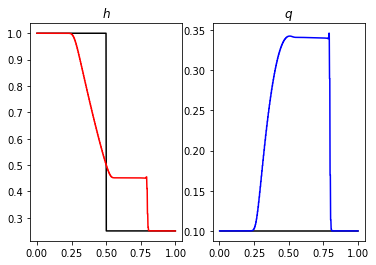

In [10]:
import pylab as plt
%matplotlib inline

dx = 1./512          # spatial step
s_h, s_q = 1.7, 1.5  # relaxation parameter
Tf = 0.25            # final time

dico = {
    'box':{'x':[xmin, xmax], 'label':0},
    'space_step':dx,
    'scheme_velocity':la,
    'schemes':[
        {
            'velocities':[1,2],
            'conserved_moments':h,
            'polynomials':[1, X],
            'relaxation_parameters':[0, s_h],
            'equilibrium':[h, q],
            'init':{h:(Riemann_pb, (h_L, h_R))},
        },
        {
            'velocities':[1,2],
            'conserved_moments':q,
            'polynomials':[1, X],
            'relaxation_parameters':[0, s_q],
            'equilibrium':[q, q**2/h+.5*g*h**2],
            'init':{q:(Riemann_pb, (q_L, q_R))},
        },
    ],
    'boundary_conditions':{
        0:{'method':{0: pyLBM.bc.Neumann, 1: pyLBM.bc.Neumann}, 'value':None},
    },
    'parameters':{LA:la, g:1.},
    'generator': 'numpy',
}

sol = pyLBM.Simulation(dico)
x = sol.domain.x
plt.figure()
plt.clf()
plt.subplot(1,2,1)
plt.plot(x, sol.m[h], 'k')
plt.title(r'$h$')
plt.subplot(1,2,2)
plt.plot(x, sol.m[q], 'k')
plt.title(r'$q$')
while (sol.t<Tf):
    sol.one_time_step()
plt.subplot(1,2,1)
plt.plot(x, sol.m[h], 'r')
plt.subplot(1,2,2)
plt.plot(x, sol.m[q], 'b')
plt.show()

## Euler in 1D

The Euler system reads
$$\begin{aligned}&\drondt \rho + \drondx q = 0,\\ &\drondt q + \drondx \Bigl[ (\gamma-1)E + \frac{3-\gamma}{2} \frac{q^2}{\rho} \Bigr] = 0,\\ &\drondt E + \drondx \Bigl[ \gamma\frac{Eq}{\rho} - \frac{\gamma-1}{2} \frac{q^3}{\rho^2}\Bigr] = 0, \end{aligned}$$
where $\gamma=1.4$ for instance.

The solution of this system is computed by using a vectorial scheme composed by $3$ coupled $\DdQq{1}{2}$. The initial condition will be a Riemann problem to simulate the shock tube of Sod corresponding to
$$\rho_L = 1, \rho_R=\frac{1}{8}, p_L=1, p_R=\frac{1}{10}, u_L=u_R = 0,$$
with
$$q = \rho u, \quad E = \rho u^2 + \frac{p}{\gamma-1}.$$

/home/loic/miniconda3/envs/pylbm/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


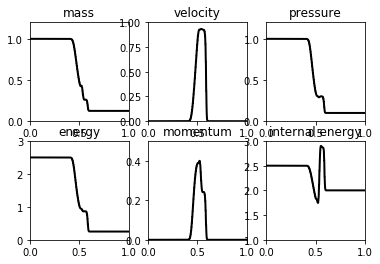

In [6]:
import sympy as sp
import pyLBM

%matplotlib inline

def Riemann_pb(x, u_L, u_R):
    xm = 0.5*(xmin+xmax)
    return u_L*(x<xm) + u_R*(x>xm) + 0.5*(u_L+u_R)*(x==xm)

# parameters
rho, q, E, X, LA = sp.symbols('rho,q,E,X,LA')
# parameters
gamma = 1.4
xmin, xmax = 0., 1.
dx = 1.e-3 # spatial step
la = 3. # velocity of the scheme
rho_L, rho_R, p_L, p_R, u_L, u_R = 1., 1./8., 1., 0.1, 0., 0.
q_L = rho_L*u_L
q_R = rho_R*u_R
E_L = rho_L*u_L**2 + p_L/(gamma-1.)
E_R = rho_R*u_R**2 + p_R/(gamma-1.)
Tf = 0.14 # final time
s_rho, s_q, s_E = 1.9, 1.5, 1.4

dico = {
    'box':{'x':[xmin, xmax], 'label':0},
    'space_step':dx,
    'scheme_velocity':la,
    'schemes':[
        {
            'velocities':[1,2],
            'conserved_moments':rho,
            'polynomials':[1, LA*X],
            'relaxation_parameters':[0, s_rho],
            'equilibrium':[rho, q],
            'init':{rho:(Riemann_pb, (rho_L, rho_R))},
        },
        {
            'velocities':[1,2],
            'conserved_moments':q,
            'polynomials':[1, LA*X],
            'relaxation_parameters':[0, s_q],
            'equilibrium':[q, (gamma-1.)*E+0.5*(3.-gamma)*q**2/rho],
            'init':{q:(Riemann_pb, (q_L, q_R))},
        },
        {
            'velocities':[1,2],
            'conserved_moments':E,
            'polynomials':[1, LA*X],
            'relaxation_parameters':[0, s_E],
            'equilibrium':[E, gamma*E*q/rho-0.5*(gamma-1.)*q**3/rho**2],
            'init':{E:(Riemann_pb, (E_L, E_R))},
        },
    ],
    'boundary_conditions':{
        0:{
            'method':{
                0: pyLBM.bc.Neumann,
                1: pyLBM.bc.Neumann,
                2: pyLBM.bc.Neumann
            },
            'value':None
        },
    },
    'parameters':{LA:la},
    'generator': 'numpy',
}

sol = pyLBM.Simulation(dico)
while (sol.t<Tf):
    sol.one_time_step()

x = sol.domain.x
rho = sol.m[rho]
q = sol.m[q]
E = sol.m[E]
u = q/rho
p = (gamma-1.)*(E - .5*rho*u**2)
e = E/rho - .5*u**2
viewer = pyLBM.viewer.matplotlibViewer
fig = viewer.Fig(2,3)
lrho = fig[0,0].plot(x, rho, width=2, color='k')[0]
fig[0,0].axis(xmin, xmax, 0., 1.2)
fig[0,0].title = 'mass'
lu = fig[0,1].plot(x, u, width=2, color='k')[0]
fig[0,1].axis(xmin, xmax, 0., 1.)
fig[0,1].title = 'velocity'
lp = fig[0,2].plot(x, p, width=2, color='k')[0]
fig[0,2].axis(xmin, xmax, 0., 1.2)
fig[0,2].title = 'pressure'
lE = fig[1,0].plot(x, E, width=2, color='k')[0]
fig[1,0].axis(xmin, xmax, 0., 3.)
fig[1,0].title = 'energy'
lq = fig[1,1].plot(x, q, width=2, color='k')[0]
fig[1,1].axis(xmin, xmax, 0., .5)
fig[1,1].title = 'momentum'
le = fig[1,2].plot(x, e, width=2, color='k')[0]
fig[1,2].axis(xmin, xmax, 1., 3.)
fig[1,2].title = 'internal energy'
fig.show()

## Shallow water in 2D

The system reads
$$\begin{aligned}&\drondt h + \drondx q_x + \drondy q_y = 0, \\ &\drondt q_x + \drondx(q_x^2/h+gh^2/2) + \drondy (q_xq_h/h) = 0, \\ &\drondt q_y + \drondx (q_xq_h/h) + \drondy(q_y^2/h+gh^2/2) = 0, \end {aligned}$$
where $g$ can be taken to $1$.
The simulation will be done on $(-1,1)\times(-1,1)$ and periodical boundary conditions will be added.

We propose a vectorial scheme build with $3$ elementary $\DdQq{2}{4}$ schemes, one for each scalar equation. The velocity of the scheme will be taken to $4$.

The initialization reads
$$h(x, y) = 1 + {\mathbf 1}_{x^2+y^2<r^2},\qquad q_x=q_y = 0,$$
where $r=1/4$.

In [31]:
import numpy as np
import sympy as sp
import pyLBM

X, Y, LA = sp.symbols('X, Y, LA')
h, qx, qy = sp.symbols('h, qx, qy')

def h0(x, y):
    return h_l * np.ones((x.size, y.size), dtype='float64') \
        + (h_h-h_l) * ((x-0.5*(xmin+xmax))**2+(y-0.5*(ymin+ymax))**2 < 0.25**2)

# parameters
dx = 1./128  # spatial step
la = 4.      # velocity of the scheme
h_l = 1.     # low value of the water height
h_h = 2.     # high value of the water height
L = 2        # size of the domain
g = 1.       # gravity
s_h1 = 2.
s_h2 = 1.5
s_q1 = 1.5
s_q2 = 1.2
# initialization
xmin, xmax, ymin, ymax = -.5*L, .5*L, -.5*L, .5*L
s_h = [0., s_h1, s_h1, s_h2]
s_q = [0., s_q1, s_q1, s_q2]

vitesse = list(range(1,5))
polynomes = [1, LA*X, LA*Y, X**2-Y**2]

dico = {
    'box':{'x':[xmin, xmax], 'y':[ymin, ymax], 'label':-1},
    'space_step':dx,
    'scheme_velocity':la,
    'parameters':{LA:la},
    'schemes':[
        {
            'velocities':vitesse,
            'conserved_moments':h,
            'polynomials':polynomes,
            'relaxation_parameters':s_h,
            'equilibrium':[h, qx, qy, 0.],
            'init':{h:(h0,)},
        },
        {
            'velocities':vitesse,
            'conserved_moments':qx,
            'polynomials':polynomes,
            'relaxation_parameters':s_q,
            'equilibrium':[qx, qx**2/h + 0.5*g*h**2, qx*qy/h, 0.],
            'init':{qx:0.},
        },
        {
            'velocities':vitesse,
            'conserved_moments':qy,
            'polynomials':polynomes,
            'relaxation_parameters':s_q,
            'equilibrium':[qy, qx*qy/h, qy**2/h + 0.5*g*h**2, 0.],
            'init':{qy:0.},
        },
    ],
    'generator': 'cython',
}

sol = pyLBM.Simulation(dico)

In [32]:
def animate(i):
    nrep = 32
    for i in range(nrep):
         sol.one_time_step()

    ax.set_title('water height at t = {0:f}'.format(sol.t))
    image.set_data(sol.m[h])

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

<IPython.core.display.Javascript object>


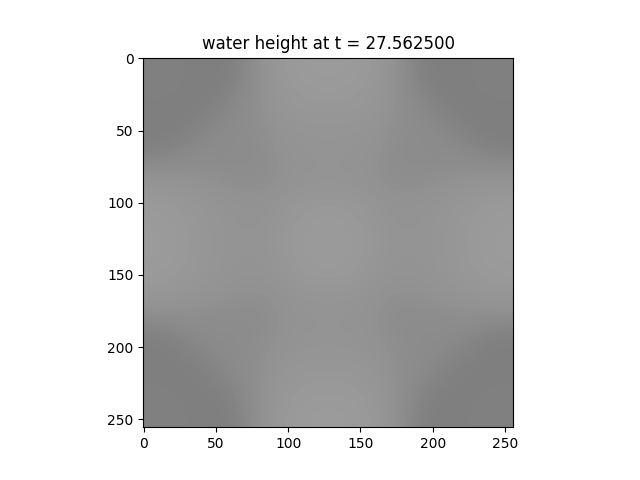

In [35]:
fig, ax = plt.subplots()
image = ax.imshow(sol.m[h], cmap = cm.Greys, animated=True, clim=(0., 2.))
anim = animation.FuncAnimation(fig, animate, frames=500, interval=1)